<a href="https://colab.research.google.com/github/MBABHISHEK/Maths_ML/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('durg.csv')

In [2]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


To check weather the dataset contains any null values


In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

IN the above output-0 indicates that all cloumns have some value
now check for the duplicate records present in the dataset



In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


M    104
F     96
Name: Sex, dtype: int64


[]

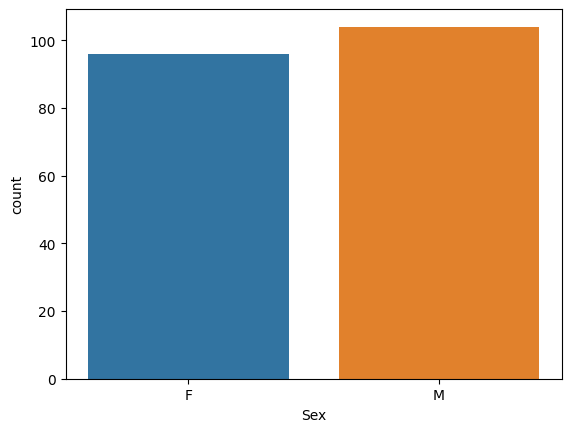

In [13]:
x=df.Sex.value_counts()
print(x)
p=sns.countplot(data=df,x="Sex")
plt.plot()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


[]

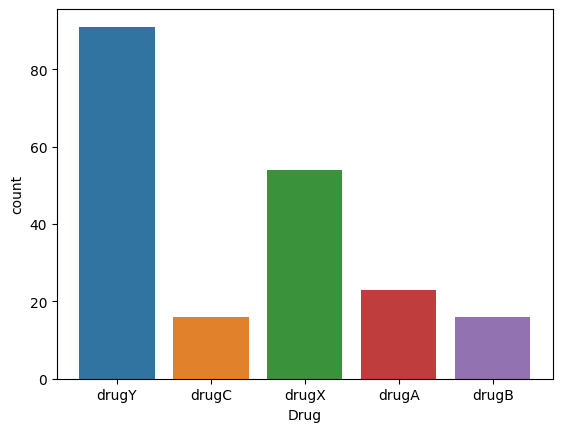

In [14]:
x=df.Drug.value_counts()
print(x)
p=sns.countplot(data=df,x="Drug")
plt.plot()

In [15]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<Figure size 1000x1000 with 0 Axes>

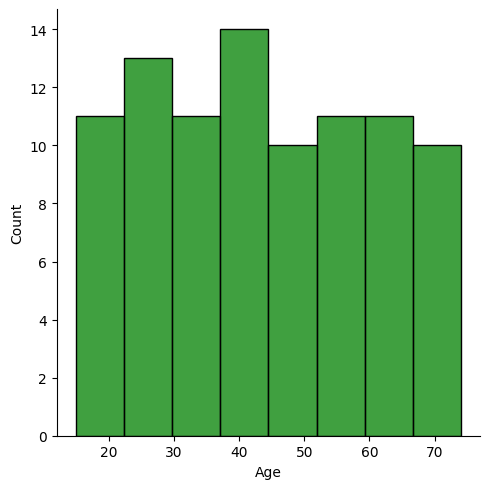

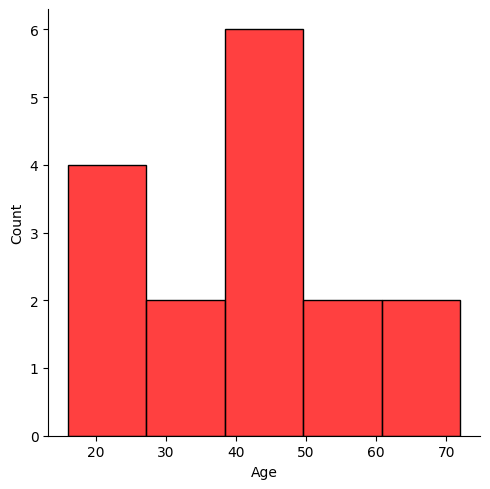

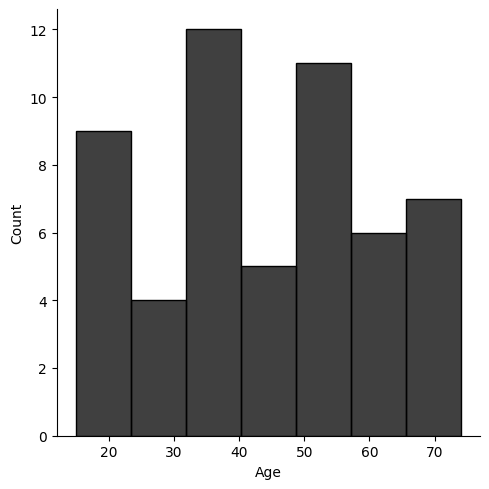

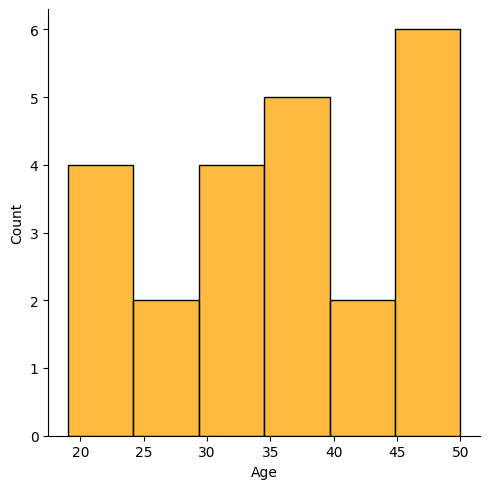

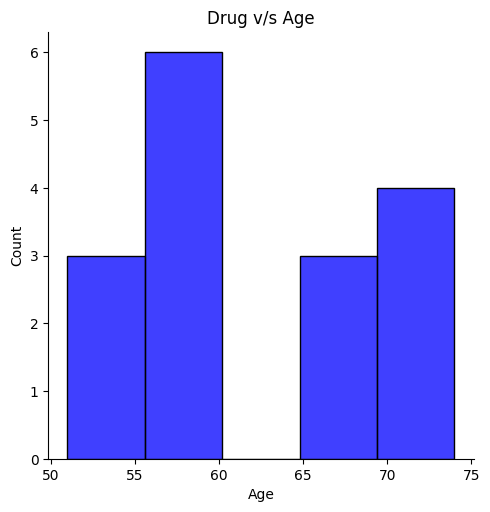

In [21]:
plt.figure(figsize=(10,10))
sns.displot(df[df['Drug'] == 'drugY']['Age'],color='green',)
sns.displot(df[df['Drug'] == 'drugC']['Age'],color='red',)
sns.displot(df[df['Drug'] == 'drugX']['Age'],color='black',)
sns.displot(df[df['Drug'] == 'drugA']['Age'],color='orange',)
sns.displot(df[df['Drug'] == 'drugB']['Age'],color='blue',)
plt.title("Drug v/s Age")
plt.show()

<ipython-input-23-cbe9834797c3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Drug'] == 'drugY']['Age'], color='green', label='Drug Y', shade=True)
<ipython-input-23-cbe9834797c3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Drug'] == 'drugC']['Age'], color='red', label='Drug C', shade=True)
<ipython-input-23-cbe9834797c3>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Drug'] == 'drugX']['Age'], color='black', label='Drug X', shade=True)
<ipython-input-23-cbe9834797c3>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn 

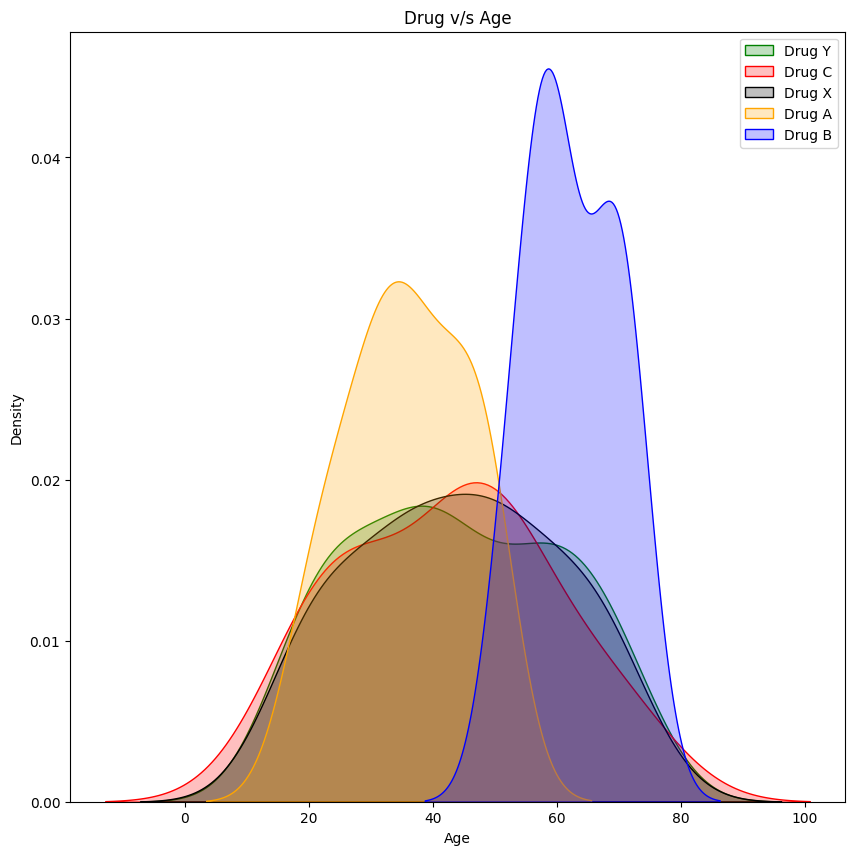

In [23]:
plt.figure(figsize=(10, 10))

# Plotting overlaid distribution plots
sns.kdeplot(df[df['Drug'] == 'drugY']['Age'], color='green', label='Drug Y', shade=True)
sns.kdeplot(df[df['Drug'] == 'drugC']['Age'], color='red', label='Drug C', shade=True)
sns.kdeplot(df[df['Drug'] == 'drugX']['Age'], color='black', label='Drug X', shade=True)
sns.kdeplot(df[df['Drug'] == 'drugA']['Age'], color='orange', label='Drug A', shade=True)
sns.kdeplot(df[df['Drug'] == 'drugB']['Age'], color='blue', label='Drug B', shade=True)

plt.title("Drug v/s Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

we need to transfer the non-numerical data into the numerical data with help  of ordinalencoder

In [27]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df[['BP', 'Sex', 'Cholesterol', 'Drug']] = oe.fit_transform(df[['BP', 'Sex', 'Cholesterol', 'Drug']])


In [28]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,4.0
1,47,1.0,1.0,0.0,13.093,2.0
2,47,1.0,1.0,0.0,10.114,2.0
3,28,0.0,2.0,0.0,7.798,3.0
4,61,0.0,1.0,0.0,18.043,4.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,2.0
196,16,1.0,1.0,0.0,12.006,2.0
197,52,1.0,2.0,0.0,9.894,3.0
198,23,1.0,2.0,1.0,14.020,3.0


In [29]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [30]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [31]:
y

0      4.0
1      2.0
2      2.0
3      3.0
4      4.0
      ... 
195    2.0
196    2.0
197    3.0
198    3.0
199    3.0
Name: Drug, Length: 200, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [33]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0.0,1.0,1.0,10.840
197,52,1.0,2.0,0.0,9.894
38,39,0.0,2.0,1.0,9.709
24,33,0.0,1.0,0.0,33.486
122,34,1.0,2.0,0.0,22.456
...,...,...,...,...,...
106,22,1.0,2.0,0.0,11.953
14,50,0.0,2.0,0.0,12.703
92,29,0.0,0.0,0.0,29.450
179,67,0.0,2.0,0.0,15.891


In [34]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion ='gini',random_state=0)
clf_gini.fit(x_train,y_train)
y_pred_gini=clf_gini.predict(x_test)

In [35]:
y_pred_gini

array([3., 4., 3., 2., 4., 4., 4., 3., 0., 3., 0., 3., 4., 0., 1., 4., 1.,
       3., 2., 4., 1., 3., 3., 4., 4., 4., 2., 3., 4., 3., 4., 2., 2., 4.,
       0., 4., 3., 0., 4., 0.])

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_gini,y_test))

1.0


<function matplotlib.pyplot.show(close=None, block=None)>

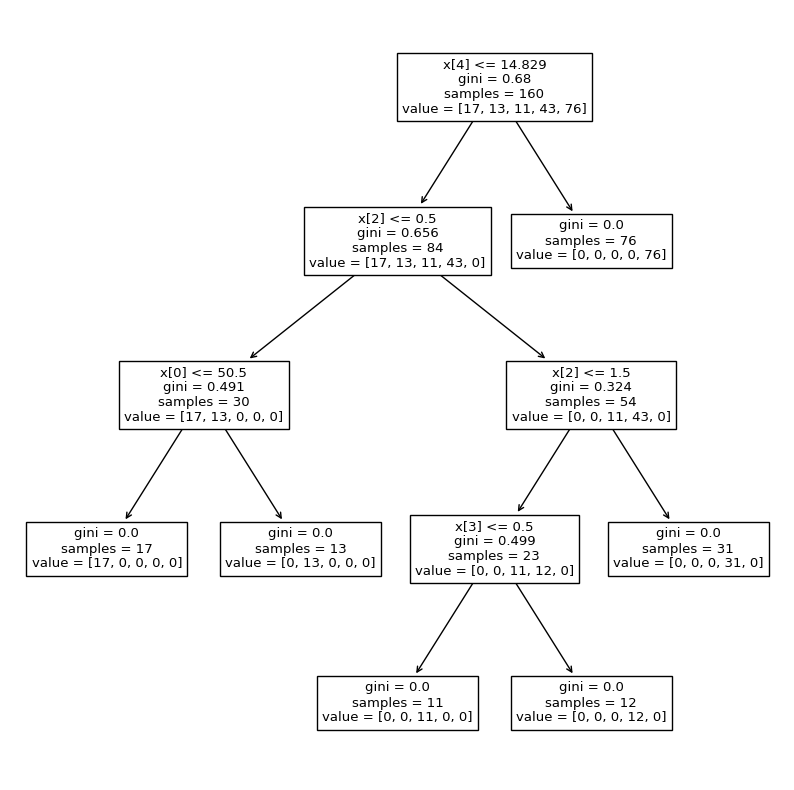

In [38]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf_gini.fit(x_train,y_train))
plt.show